In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/MLPMathbert.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.352619,0.740383,1.695507,-0.497447,-0.253905,0.353412,-1.814519,-0.696096,0.060391,-0.253737,...,-1.643887,0.339685,-0.527624,-1.161371,-0.311803,-2.534818,0.355998,-1.037141,-0.179799,10.0
1,-1.420213,0.797541,1.748843,-0.571877,-0.252812,0.339780,-1.854758,-0.762319,0.020805,-0.189125,...,-1.803290,0.473447,-0.733731,-1.262858,-0.242166,-2.713816,0.407162,-1.286306,-0.113263,8.0
2,-1.368912,0.746201,1.696832,-0.494727,-0.272787,0.368430,-1.816879,-0.685664,0.063248,-0.245440,...,-1.681083,0.352918,-0.540397,-1.176312,-0.307004,-2.558727,0.368295,-1.052009,-0.179067,7.0
3,-1.325854,0.712799,1.688295,-0.446782,-0.250683,0.383208,-1.807232,-0.798908,0.040290,-0.186828,...,-1.517830,0.231948,-0.438471,-1.140065,-0.329188,-2.411578,0.353673,-0.975457,-0.245434,5.0
4,-1.397086,0.710150,1.714247,-0.499317,-0.246137,0.346470,-1.803932,-0.688624,0.040671,-0.236518,...,-1.601079,0.267904,-0.489620,-1.223516,-0.302886,-2.498412,0.401934,-1.003436,-0.155283,6.0


In [ ]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [ ]:
mean_value = df['score'].mean()

df['score'].fillna(mean_value, inplace=True)

# Display the DataFrame after imputation
print("DataFrame after imputation:")
df.head()

DataFrame after imputation:


<ipython-input-4-cbca18f313f8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score'].fillna(mean_value, inplace=True)


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.352619,0.740383,1.695507,-0.497447,-0.253905,0.353412,-1.814519,-0.696096,0.060391,-0.253737,...,-1.643887,0.339685,-0.527624,-1.161371,-0.311803,-2.534818,0.355998,-1.037141,-0.179799,10.0
1,-1.420213,0.797541,1.748843,-0.571877,-0.252812,0.339780,-1.854758,-0.762319,0.020805,-0.189125,...,-1.803290,0.473447,-0.733731,-1.262858,-0.242166,-2.713816,0.407162,-1.286306,-0.113263,8.0
2,-1.368912,0.746201,1.696832,-0.494727,-0.272787,0.368430,-1.816879,-0.685664,0.063248,-0.245440,...,-1.681083,0.352918,-0.540397,-1.176312,-0.307004,-2.558727,0.368295,-1.052009,-0.179067,7.0
3,-1.325854,0.712799,1.688295,-0.446782,-0.250683,0.383208,-1.807232,-0.798908,0.040290,-0.186828,...,-1.517830,0.231948,-0.438471,-1.140065,-0.329188,-2.411578,0.353673,-0.975457,-0.245434,5.0
4,-1.397086,0.710150,1.714247,-0.499317,-0.246137,0.346470,-1.803932,-0.688624,0.040671,-0.236518,...,-1.601079,0.267904,-0.489620,-1.223516,-0.302886,-2.498412,0.401934,-1.003436,-0.155283,6.0


In [ ]:
flag=False
for col in df.columns:
  if df[col].isnull().sum()>0:
    flag=True
    print(col)
    print(df[col].isnull().sum())
if flag==False:
  print("NO NULL VALUES")

NO NULL VALUES


In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))

# Count the number of outliers for each feature
outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=['Outlier Count'])

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outlier_counts)

Number of outliers for each feature:
       Outlier Count
0                 92
1                 88
2                 44
3                 37
4                 50
...              ...
764               38
765               27
766               73
767               69
score              1

[769 rows x 1 columns]


In [ ]:
sorted_df=outlier_counts.sort_values(by='Outlier Count')
sorted_df.tail()

,Outlier Count
150,109
99,113
759,114
237,115
329,116


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['150', '99', '759', '237', '329']
data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows_with_outliers = df[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows_with_outliers = len(unique_rows_with_outliers)
print("Number of Unique Rows with Outliers:", num_unique_rows_with_outliers)


Number of Unique Rows with Outliers: 197


In [ ]:
unique_rows_with_outliers.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
5,-1.527438,1.169207,1.619683,-0.867276,-0.193147,0.446110,-1.941865,-0.642633,0.093375,0.032724,...,-2.514038,1.103106,-1.135566,-1.617994,0.159294,-3.281953,0.327193,-1.946306,0.211031,4.0
32,-1.708991,1.112683,1.682576,-0.837516,-0.212753,0.362082,-1.827161,-0.713270,-0.229734,-0.027818,...,-2.534260,0.947030,-1.128611,-1.813296,0.139609,-3.025513,0.377187,-1.870378,0.174535,2.0
35,-1.248898,0.915683,1.675992,-0.415919,0.118495,0.064793,-1.690052,-0.511448,-0.122292,-0.272357,...,-2.118416,0.778837,-0.920556,-1.478488,-0.111426,-3.084056,0.460456,-1.720367,0.364333,8.0
54,-1.558071,0.686058,1.260507,0.063013,-0.211254,1.183610,-2.020449,-0.739206,-1.013237,-1.142493,...,0.098450,0.396428,-0.864998,0.432553,-0.589625,-2.002691,-0.427502,-0.262037,-0.311676,6.0
58,-1.510978,0.690197,1.356370,0.038721,-0.259704,1.421949,-2.117189,-0.734641,-1.136894,-1.108133,...,0.263793,0.490477,-1.158760,0.388072,-0.830516,-2.090884,-0.295311,-0.468452,-0.215738,4.0


In [ ]:
dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()


<ipython-input-10-529e798a8b1c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()
<ipython-input-10-529e798a8b1c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()
<ipython-input-10-529e798a8b1c>:1: PerformanceWarning: DataFrame is highly fragmented.  This

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(dfnew))

# Count the number of outliers for each feature
new_outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=['Outlier Count'])

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(new_outlier_counts)

Number of outliers for each feature:
       Outlier Count
0                 81
1                 77
2                 28
3                 42
4                 40
...              ...
764               48
765               20
766               65
767               61
score              1

[769 rows x 1 columns]


In [ ]:
dfnew.shape

(978, 769)

In [ ]:
sorted_dfn=new_outlier_counts.sort_values(by='Outlier Count')
sorted_dfn.tail()

,Outlier Count
759,95
16,96
150,97
329,99
142,102


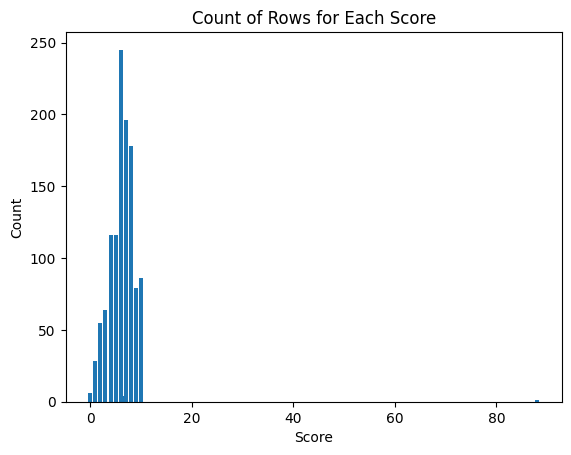

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
score_counts = df['score'].value_counts()

# Plotting the bar plot
plt.bar(score_counts.index, score_counts.values)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Rows for Each Score')

# Show the plot
plt.show()


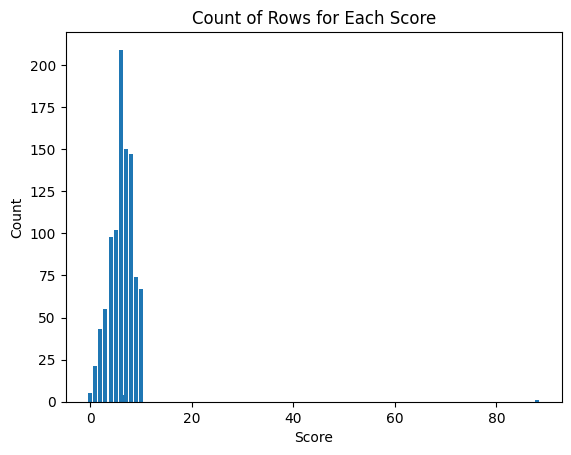

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
score_counts = dfnew['score'].value_counts()

# Plotting the bar plot
plt.bar(score_counts.index, score_counts.values)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Rows for Each Score')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                     '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                     '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                     '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                     '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                     '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                     '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
                     '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
                     '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
                     '111', '112', '113', '114', '115', '116', '117', '118', '119', '120',
                     '121', '122', '123', '124', '125', '126', '127', '128', '129', '130',
                     '131', '132', '133', '134', '135', '136', '137', '138', '139', '140',
                     '141', '142', '143', '144', '145', '146', '147', '148', '149', '150',
                     '151', '152', '153', '154', '155', '156', '157', '158', '159', '160',
                     '161', '162', '163', '164', '165', '166', '167', '168', '169', '170',
                     '171', '172', '173', '174', '175', '176', '177', '178', '179', '180',
                     '181', '182', '183', '184', '185', '186', '187', '188', '189', '190',
                     '191', '192', '193', '194', '195', '196', '197', '198', '199', '200',
                     '201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
                     '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
                     '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
                     '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
                     '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
                     '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
                     '261', '262', '263', '264', '265', '266', '267', '268', '269', '270',
                     '271', '272', '273', '274', '275', '276', '277', '278', '279', '280',
                     '281', '282', '283', '284', '285', '286', '287', '288', '289', '290',
                     '291', '292', '293', '294', '295', '296', '297', '298', '299', '300',
                     '301', '302', '303', '304', '305', '306', '307', '308', '309', '310',
                     '311', '312', '313', '314', '315', '316', '317', '318', '319', '320',
                     '321', '322', '323', '324', '325', '326', '327', '328', '329', '330',
                     '331', '332', '333', '334', '335', '336', '337', '338', '339', '340',
                     '341', '342', '343', '344', '345', '346', '347', '348', '349', '350',
                     '351', '352', '353', '354', '355', '356', '357', '358', '359', '360',
                     '361', '362', '363', '364', '365', '366', '367', '368', '369', '370',
                     '371', '372', '373', '374', '375', '376', '377', '378', '379', '380',
                     '381', '382', '383', '384', '385', '386', '387', '388', '389', '390',
                     '391', '392', '393', '394', '395', '396', '397', '398', '399', '400',
                     '401', '402', '403', '404', '405', '406', '407', '408', '409', '410',
                     '411', '412', '413', '414', '415', '416', '417', '418', '419', '420',
                     '421', '422', '423', '424', '425', '426', '427', '428', '429', '430',
                     '431', '432', '433', '434', '435', '436', '437', '438', '439', '440',
                     '441', '442', '443', '444', '445', '446', '447', '448', '449', '450',
                     '451', '452', '453', '454', '455', '456', '457', '458', '459', '460',
                     '461', '462', '463', '464', '465', '466', '467', '468', '469', '470',
                     '471', '472', '473', '474', '475', '476', '477', '478', '479', '480',
                     '481', '482', '483', '484', '485', '486', '487', '488', '489', '490',
                     '491', '492', '493', '494', '495', '496', '497', '498', '499', '500',
                     '501', '502', '503', '504', '505', '506', '507', '508', '509', '510',
                     '511', '512', '513', '514', '515', '516', '517', '518', '519', '520',
                     '521', '522', '523', '524', '525', '526', '527', '528', '529', '530',
                     '531', '532', '533', '534', '535', '536', '537', '538', '539', '540',
                     '541', '542', '543', '544', '545', '546', '547', '548', '549', '550',
                     '551', '552', '553', '554', '555', '556', '557', '558', '559', '560',
                     '561', '562', '563', '564', '565', '566', '567', '568', '569', '570',
                     '571', '572', '573', '574', '575', '576', '577', '578', '579', '580',
                     '581', '582', '583', '584', '585', '586', '587', '588', '589', '590',
                     '591', '592', '593', '594', '595', '596', '597', '598', '599', '600',
                     '601', '602', '603', '604', '605', '606', '607', '608', '609', '610',
                     '611', '612', '613', '614', '615', '616', '617', '618', '619', '620',
                     '621', '622', '623', '624', '625', '626', '627', '628', '629', '630',
                     '631', '632', '633', '634', '635', '636', '637', '638', '639', '640',
                     '641', '642', '643', '644', '645', '646', '647', '648', '649', '650',
                     '651', '652', '653', '654', '655', '656', '657', '658', '659', '660',
                     '661', '662', '663', '664', '665', '666', '667', '668', '669', '670',
                     '671', '672', '673', '674', '675', '676', '677', '678', '679', '680',
                     '681', '682', '683', '684', '685', '686', '687', '688', '689', '690',
                     '691', '692', '693', '694', '695', '696', '697', '698', '699', '700',
                     '701', '702', '703', '704', '705', '706', '707', '708', '709', '710',
                     '711', '712', '713', '714', '715', '716', '717', '718', '719', '720',
                     '721', '722', '723', '724', '725', '726', '727', '728', '729', '730',
                     '731', '732', '733', '734', '735', '736', '737', '738', '739', '740',
                     '741', '742', '743', '744', '745', '746', '747', '748', '749', '750',
                     '751', '752', '753', '754', '755', '756', '757', '758', '759', '760',
                     '761', '762', '763', '764', '765', '766', '767']
data = dfnew[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows = dfnew[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows = len(unique_rows)
print("Number of Unique Rows with Outliers:", num_unique_rows)

Number of Unique Rows with Outliers: 947


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                     '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                     '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                     '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                     '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                     '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                     '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
                     '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
                     '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
                     '111', '112', '113', '114', '115', '116', '117', '118', '119', '120',
                     '121', '122', '123', '124', '125', '126', '127', '128', '129', '130',
                     '131', '132', '133', '134', '135', '136', '137', '138', '139', '140',
                     '141', '142', '143', '144', '145', '146', '147', '148', '149', '150',
                     '151', '152', '153', '154', '155', '156', '157', '158', '159', '160',
                     '161', '162', '163', '164', '165', '166', '167', '168', '169', '170',
                     '171', '172', '173', '174', '175', '176', '177', '178', '179', '180',
                     '181', '182', '183', '184', '185', '186', '187', '188', '189', '190',
                     '191', '192', '193', '194', '195', '196', '197', '198', '199', '200',
                     '201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
                     '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
                     '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
                     '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
                     '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
                     '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
                     '261', '262', '263', '264', '265', '266', '267', '268', '269', '270',
                     '271', '272', '273', '274', '275', '276', '277', '278', '279', '280',
                     '281', '282', '283', '284', '285', '286', '287', '288', '289', '290',
                     '291', '292', '293', '294', '295', '296', '297', '298', '299', '300',
                     '301', '302', '303', '304', '305', '306', '307', '308', '309', '310',
                     '311', '312', '313', '314', '315', '316', '317', '318', '319', '320',
                     '321', '322', '323', '324', '325', '326', '327', '328', '329', '330',
                     '331', '332', '333', '334', '335', '336', '337', '338', '339', '340',
                     '341', '342', '343', '344', '345', '346', '347', '348', '349', '350',
                     '351', '352', '353', '354', '355', '356', '357', '358', '359', '360',
                     '361', '362', '363', '364', '365', '366', '367', '368', '369', '370',
                     '371', '372', '373', '374', '375', '376', '377', '378', '379', '380',
                     '381', '382', '383', '384', '385', '386', '387', '388', '389', '390',
                     '391', '392', '393', '394', '395', '396', '397', '398', '399', '400',
                     '401', '402', '403', '404', '405', '406', '407', '408', '409', '410',
                     '411', '412', '413', '414', '415', '416', '417', '418', '419', '420',
                     '421', '422', '423', '424', '425', '426', '427', '428', '429', '430',
                     '431', '432', '433', '434', '435', '436', '437', '438', '439', '440',
                     '441', '442', '443', '444', '445', '446', '447', '448', '449', '450',
                     '451', '452', '453', '454', '455', '456', '457', '458', '459', '460',
                     '461', '462', '463', '464', '465', '466', '467', '468', '469', '470',
                     '471', '472', '473', '474', '475', '476', '477', '478', '479', '480',
                     '481', '482', '483', '484', '485', '486', '487', '488', '489', '490',
                     '491', '492', '493', '494', '495', '496', '497', '498', '499', '500',
                     '501', '502', '503', '504', '505', '506', '507', '508', '509', '510',
                     '511', '512', '513', '514', '515', '516', '517', '518', '519', '520',
                     '521', '522', '523', '524', '525', '526', '527', '528', '529', '530',
                     '531', '532', '533', '534', '535', '536', '537', '538', '539', '540',
                     '541', '542', '543', '544', '545', '546', '547', '548', '549', '550',
                     '551', '552', '553', '554', '555', '556', '557', '558', '559', '560',
                     '561', '562', '563', '564', '565', '566', '567', '568', '569', '570',
                     '571', '572', '573', '574', '575', '576', '577', '578', '579', '580',
                     '581', '582', '583', '584', '585', '586', '587', '588', '589', '590',
                     '591', '592', '593', '594', '595', '596', '597', '598', '599', '600',
                     '601', '602', '603', '604', '605', '606', '607', '608', '609', '610',
                     '611', '612', '613', '614', '615', '616', '617', '618', '619', '620',
                     '621', '622', '623', '624', '625', '626', '627', '628', '629', '630',
                     '631', '632', '633', '634', '635', '636', '637', '638', '639', '640',
                     '641', '642', '643', '644', '645', '646', '647', '648', '649', '650',
                     '651', '652', '653', '654', '655', '656', '657', '658', '659', '660',
                     '661', '662', '663', '664', '665', '666', '667', '668', '669', '670',
                     '671', '672', '673', '674', '675', '676', '677', '678', '679', '680',
                     '681', '682', '683', '684', '685', '686', '687', '688', '689', '690',
                     '691', '692', '693', '694', '695', '696', '697', '698', '699', '700',
                     '701', '702', '703', '704', '705', '706', '707', '708', '709', '710',
                     '711', '712', '713', '714', '715', '716', '717', '718', '719', '720',
                     '721', '722', '723', '724', '725', '726', '727', '728', '729', '730',
                     '731', '732', '733', '734', '735', '736', '737', '738', '739', '740',
                     '741', '742', '743', '744', '745', '746', '747', '748', '749', '750',
                     '751', '752', '753', '754', '755', '756', '757', '758', '759', '760',
                     '761', '762', '763', '764', '765', '766', '767']
data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows = df[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows = len(unique_rows)
print("Number of Unique Rows with Outliers:", num_unique_rows)

Number of Unique Rows with Outliers: 1144


In [ ]:
import pandas as pd
from scipy.stats import zscore


# Calculate Z-scores for the target column
z_scores = zscore(df['score'])

# Define a threshold (e.g., 3) beyond which a data point is considered an outlier
threshold = 3

# Identify and remove rows with target values considered outliers
outliers_mask = abs(z_scores) > threshold
ndf = df[~outliers_mask]

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")
ndf.head()


DataFrame after removing outliers:


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.352619,0.740383,1.695507,-0.497447,-0.253905,0.353412,-1.814519,-0.696096,0.060391,-0.253737,...,-1.643887,0.339685,-0.527624,-1.161371,-0.311803,-2.534818,0.355998,-1.037141,-0.179799,10.0
1,-1.420213,0.797541,1.748843,-0.571877,-0.252812,0.339780,-1.854758,-0.762319,0.020805,-0.189125,...,-1.803290,0.473447,-0.733731,-1.262858,-0.242166,-2.713816,0.407162,-1.286306,-0.113263,8.0
2,-1.368912,0.746201,1.696832,-0.494727,-0.272787,0.368430,-1.816879,-0.685664,0.063248,-0.245440,...,-1.681083,0.352918,-0.540397,-1.176312,-0.307004,-2.558727,0.368295,-1.052009,-0.179067,7.0
3,-1.325854,0.712799,1.688295,-0.446782,-0.250683,0.383208,-1.807232,-0.798908,0.040290,-0.186828,...,-1.517830,0.231948,-0.438471,-1.140065,-0.329188,-2.411578,0.353673,-0.975457,-0.245434,5.0
4,-1.397086,0.710150,1.714247,-0.499317,-0.246137,0.346470,-1.803932,-0.688624,0.040671,-0.236518,...,-1.601079,0.267904,-0.489620,-1.223516,-0.302886,-2.498412,0.401934,-1.003436,-0.155283,6.0


In [ ]:
ndf.shape

(1175, 769)

In [ ]:
ndf = ndf[ndf['score'] <= 10]


In [ ]:
ndf = ndf[ndf['score'] >= 0]

In [ ]:
ndf['score'] = ndf['score'].round().astype(int)


In [ ]:
ndf.shape

(1175, 769)

FEATURE SELECTION USING ELASTIC NET AND LASSO REGRESSION

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
X=ndf.drop('score', axis=1)
y=ndf['score']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Elastic Net model
alpha = 0.5  # Parameter for the L1 regularization term (LASSO)
l1_ratio = 0.5  # Mixing parameter between L1 and L2 regularization (Elastic Net)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# Train the Elastic Net model
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")

# Display the selected coefficients (non-zero coefficients indicate selected features)
print("Selected Coefficients:")
res=elastic_net.coef_
print(res)

Mean Squared Error: 4.88687
Selected Coefficients:
[-0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.          0.         -0.          0.01048436 -0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.
 -0.          0.          0.          0

In [ ]:
selected = [index for index, value in enumerate(res) if value != 0]

print("Indexes of non-zero numbers:", selected)

Indexes of non-zero numbers: [45, 148, 219, 530, 628, 671]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.1  # Regularization strength (adjustable parameter)
lasso_model = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model.fit(X_train, y_train)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model.coef_)

Learned Coefficients:
[-0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.         -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.02825746 -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.          0.
 -0

In [ ]:
lasso_res = [index for index, value in enumerate(lasso_model.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res)

Indexes of non-zero numbers: [31, 96, 148, 284, 351, 414, 502, 520, 628, 631, 671, 686, 695]


In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.288e+01, tolerance: 3.835e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.389e+01, tolerance: 3.791e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.686e+01, tolerance: 3.704e

0.04661310559055187
0.09232041993689047


In [ ]:
#best alpha=0.0170216866235795
#applying lasso again with hyperparam tuning
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.03230406454471235 # Regularization strength (adjustable parameter)
lasso_model_hp = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model_hp.fit(X_train, y_train)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model_hp.coef_)
lasso_res_hp = [index for index, value in enumerate(lasso_model_hp.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res_hp)

Learned Coefficients:
[-0.          0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.          0.10044676 -0.          0.         -0.
 -0.          0.07280709 -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.         -0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0

In [ ]:
ndf.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
764,float64
765,float64
766,float64
767,float64


In [ ]:
unique_values = ndf['score'].unique()

#print(f"Unique values of the '{feature_name}' feature:")
print(unique_values)

[10  8  7  5  6  4  9  1  2  3  0]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named original_df

# List of features you want to select
selected_features = ['26', '31', '135', '148', '149', '154', '172', '188', '192', '209', '249', '270', '284', '287', '293', '306', '319', '327', '351', '354', '395', '406', '414', '487', '498', '502', '515', '520', '529', '530', '546', '547', '581', '628', '630', '631', '644', '671', '682', '696', '717', '738', '765'
]

# Create a new DataFrame with selected features
new_df = ndf[selected_features].copy()

# Display the new DataFrame
print(new_df)


            26        31       135       148       149       154       172  \
0     0.919036  0.100836  0.401898 -0.130805  0.699721 -1.647318 -0.742040   
1     0.893054  0.109866  0.562320 -0.072783  0.807738 -1.739822 -0.724364   
2     0.926016  0.105606  0.394079 -0.117664  0.703937 -1.650184 -0.755664   
3     0.869368  0.123643  0.395315 -0.117347  0.722123 -1.584943 -0.655715   
4     0.852980  0.068843  0.395325 -0.142419  0.690078 -1.673382 -0.685281   
...        ...       ...       ...       ...       ...       ...       ...   
1171  1.318686 -1.666106  0.212792 -0.348561 -0.435740  0.459228 -2.184260   
1172  1.065299 -0.460369  0.198271 -0.359335 -0.369153  0.225843 -0.255010   
1173  1.157018 -0.383350  0.084909 -0.394892 -0.369770  0.208844 -0.350054   
1174  0.983034 -0.580745  0.021099 -1.010530  0.382829  0.029132 -0.137132   
1175  1.256550 -0.448021 -0.014790 -0.391155 -0.371874  0.192285 -0.335297   

           188       192       209  ...       628       630    

In [ ]:
ndf = ndf.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)
ndf['index']=range(len(ndf))
ndf.set_index('index', inplace=True)
new_df['index']=range(len(new_df))
new_df.set_index('index', inplace=True)

In [ ]:
ndf.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
index,,,,,,,,,,,,,,,,,,,,,
0,-1.352619,0.740383,1.695507,-0.497447,-0.253905,0.353412,-1.814519,-0.696096,0.060391,-0.253737,...,-1.643887,0.339685,-0.527624,-1.161371,-0.311803,-2.534818,0.355998,-1.037141,-0.179799,10
1,-1.420213,0.797541,1.748843,-0.571877,-0.252812,0.339780,-1.854758,-0.762319,0.020805,-0.189125,...,-1.803290,0.473447,-0.733731,-1.262858,-0.242166,-2.713816,0.407162,-1.286306,-0.113263,8
2,-1.368912,0.746201,1.696832,-0.494727,-0.272787,0.368430,-1.816879,-0.685664,0.063248,-0.245440,...,-1.681083,0.352918,-0.540397,-1.176312,-0.307004,-2.558727,0.368295,-1.052009,-0.179067,7
3,-1.325854,0.712799,1.688295,-0.446782,-0.250683,0.383208,-1.807232,-0.798908,0.040290,-0.186828,...,-1.517830,0.231948,-0.438471,-1.140065,-0.329188,-2.411578,0.353673,-0.975457,-0.245434,5
4,-1.397086,0.710150,1.714247,-0.499317,-0.246137,0.346470,-1.803932,-0.688624,0.040671,-0.236518,...,-1.601079,0.267904,-0.489620,-1.223516,-0.302886,-2.498412,0.401934,-1.003436,-0.155283,6


**KMEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# kmeans model for subset dataset

X = new_df
y = ndf['score']

model_kmeans = KMeans(n_clusters=11, random_state=42)
kmeans_model = model_kmeans.fit(X)
kmeans_model.labels_

array([6, 6, 6, ..., 9, 5, 9], dtype=int32)

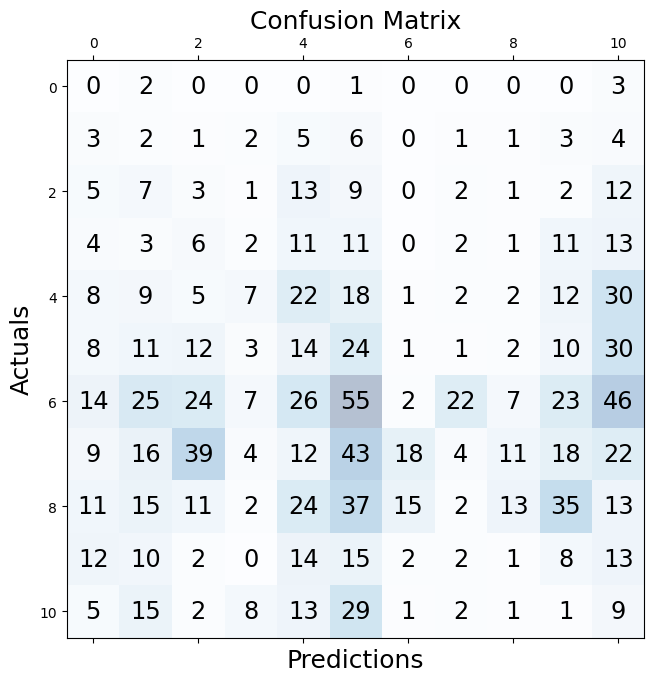

Silhouette Score: 0.23139938203071594
calinski_harabasz Score: 120.65750851057987
davies_bouldin Score: 1.5294140967105099
ari Score: 0.009722075740080507
nmi Score: 0.05130063614975093
fm_index Score: 0.13683856008698295


In [ ]:
#applying kmeans to entire dataset
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix
Xt=ndf.drop('score', axis=1)
modelt = KMeans(n_clusters=11, random_state=42)
kmeans_modelt = modelt.fit(Xt)
clusters=modelt.fit_predict(Xt)
klabels=kmeans_modelt.labels_
conf_matrix=confusion_matrix(y, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], klabels)
print(f"fm_index Score: {fm_index}")


CLUSTER DISTRIBUTION ACROSS DIFFERENT CLASSES

In [ ]:
data_with_clusters = pd.DataFrame(data=Xt, columns=Xt.columns)
data_with_clusters["Cluster"] = clusters
cluster_distribution = pd.crosstab(data_with_clusters["Cluster"], y)

print("\nCluster Distribution Across Target Variable:")
print(cluster_distribution)


Cluster Distribution Across Target Variable:
score    0   1   2   3   4   5   6   7   8   9   10
Cluster                                            
0         0   1   1   1   4   3   9   3   7   7   4
1         0   0   0   0   1   3   4   3   3   1   1
2         0   2   1   2   7   3   7   4   2   0   8
3         0   0   0   0   1   4   9   6  11   1   1
4         0   2   4   3   4   5   5   6   4   5   1
5         0   1   2   2   2   1  22   4   2   2   2
6         0   1   1   1   2   2   7  11  13   1   1
7         0   2   1   3   2   7   4   0   5   0   1
8         0   0   1   2   0   0  11  21   4   1   0
9         0   1   2   1   6   3  11   3   4   6   4
10        0   0   2   1   3   1   4   2   3   3   3
11        0   2  10   5  18   3  15   7   3   1   6
12        0   1   1   3   5  10   8   8   3   0   1
13        0   0   0   0   1   1   2  18  15   2   1
14        0   3   2   9  11   5  16  10   7   3   0
15        2   1   4   2   1   2  15   2   4   4   3
16        0   1   

In [ ]:
cluster_counts = pd.Series(clusters).value_counts()
print(cluster_counts)

11    70
14    66
24    54
16    42
19    41
9     41
6     40
12    40
21    40
5     40
15    40
26    40
8     40
13    40
17    40
0     40
29    40
30    40
20    39
4     39
18    39
27    39
2     36
25    34
22    34
3     33
7     25
10    22
1     16
28    15
23    10
Name: count, dtype: int64


In [ ]:
class_counts = pd.Series(y).value_counts()

print("Number of datapoints in each class:")
print(class_counts)

Number of datapoints in each class:
score
6     251
7     196
8     178
5     116
4     116
10     86
9      79
3      64
2      55
1      28
0       6
Name: count, dtype: int64


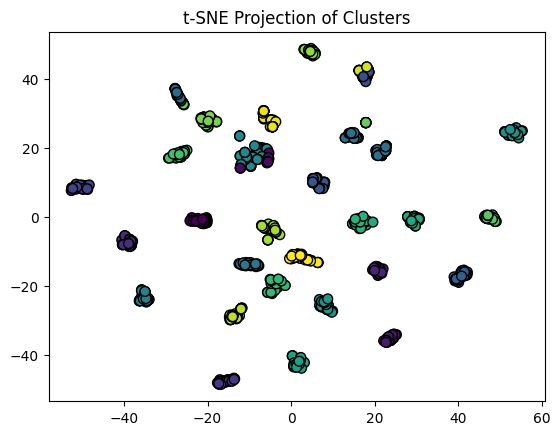

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=klabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()


Silhouette Score: 0.4525274195459719


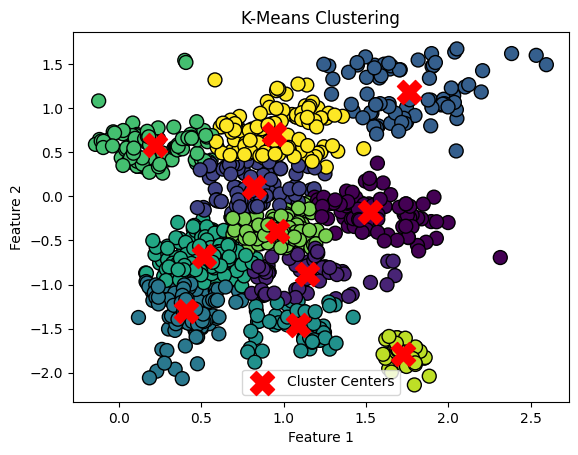

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract features (assuming you have two features for simplicity)
features = new_df[['26', '31']].values

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters
plt.scatter(features[:, 0], features[:, 1], c=clusterLabels, cmap='viridis', edgecolors='k', s=100)
centers = kMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=11, linkage='ward')
hierar_sub=hierarchical.fit_predict(X)
hierarchical.labels_

array([0, 0, 0, ..., 3, 4, 3])

In [ ]:
y_hierarchical= np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(int)
y_hierarchical

array([10,  8,  7, ...,  2,  8, 10])

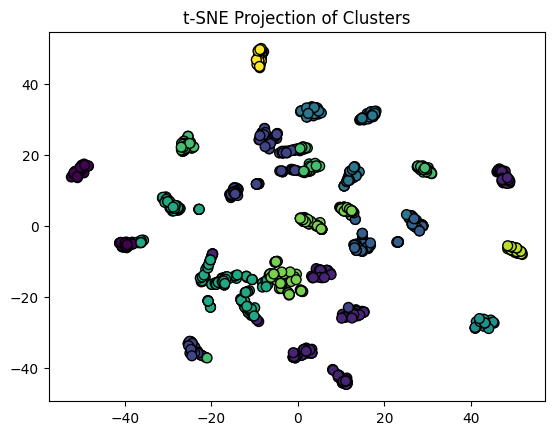

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_h = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_h[:, 0], X_tsne_h[:, 1], c=hierarchical.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

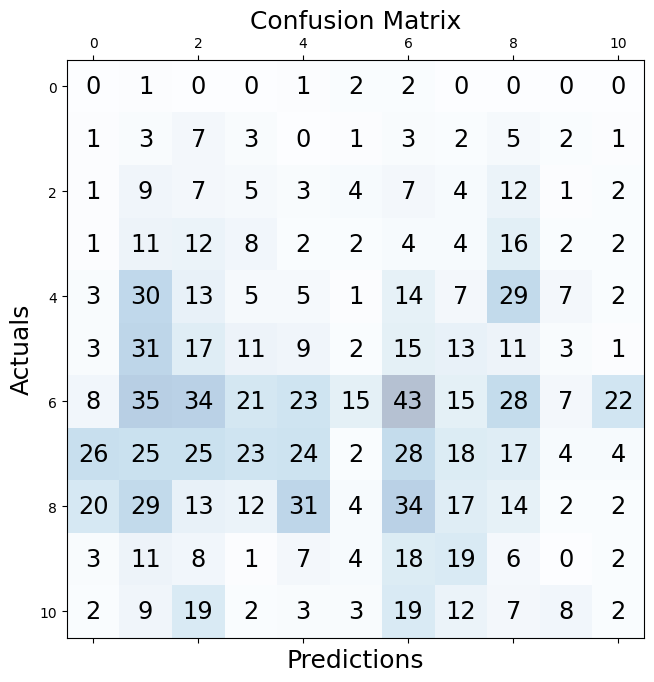

ari Score: 0.009003498058256792
nmi Score: 0.04980239496527073
fm_index Score: 0.13026414340178102
Silhouette Score: 0.2338348774329275
calinski_harabasz Score: 168.0951721706342
davies_bouldin Score: 1.4836170311101406


In [ ]:
#hierarchical for subset dataset
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, hierarchical.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], hierarchical.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], hierarchical.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], hierarchical.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, hierarchical.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, hierarchical.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, hierarchical.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


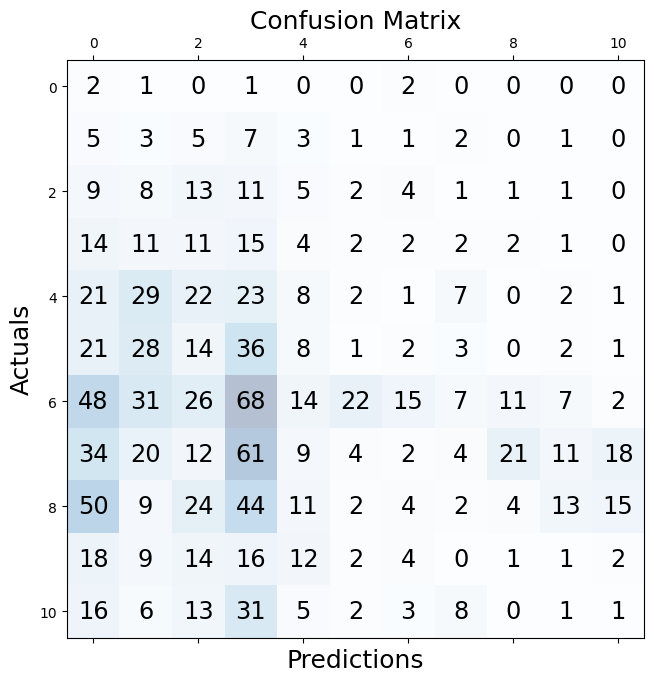

Silhouette Score: 0.30199765673719364
calinski_harabasz Score: 143.84450198587203
davies_bouldin Score: 1.2808493265243779
ari Score: 0.007813735757753373
nmi Score: 0.05274591086336851
fm_index Score: 0.15006972245349987


In [ ]:
#applying hierarchical clustering to entire dataset

Xt=ndf.drop('score', axis=1)
#modelt = KMeans(n_clusters=11, random_state=42)
hierarchicalt = hierarchical.fit_predict(Xt)
hlabels=hierarchical.labels_
conf_matrix=confusion_matrix(y, hlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, hlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, hlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, hlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], hlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], hlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], hlabels)
print(f"fm_index Score: {fm_index}")


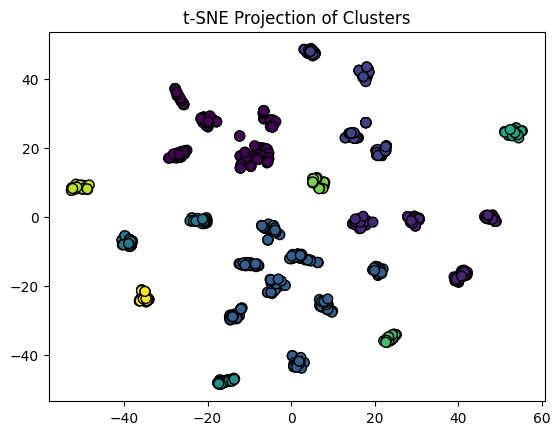

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hlabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()


DBSCAN CLUSTERING

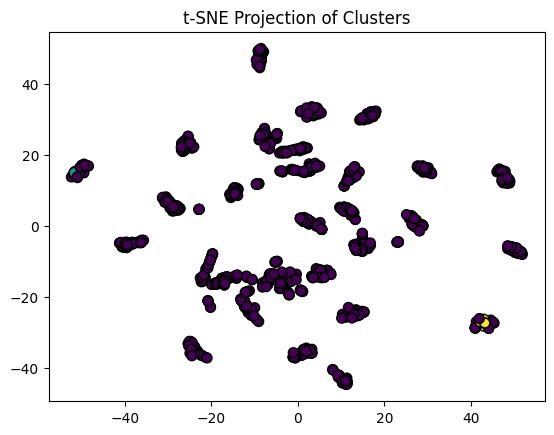

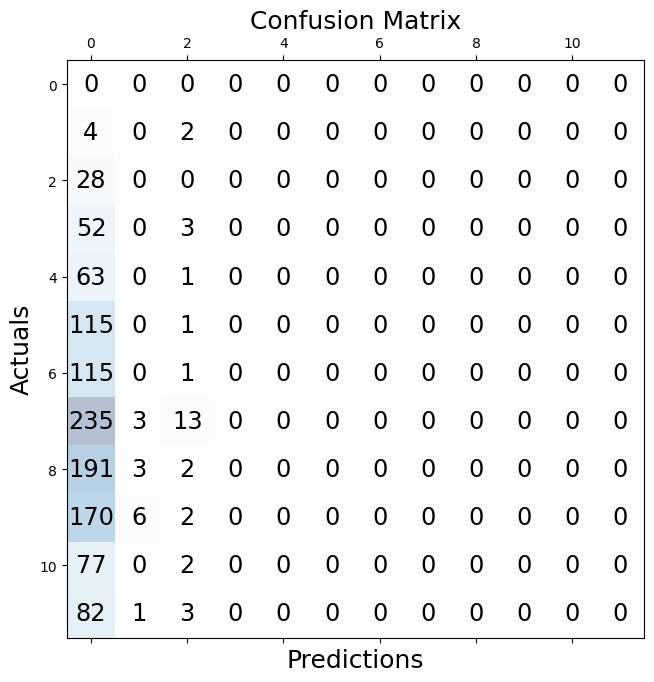

ari Score: -0.002331813672398601
nmi Score: 0.014465736033290863
fm_index Score: 0.3458140899130148
Silhouette Score: 0.12666757646475524
calinski_harabasz Score: 69.49661457871768
davies_bouldin Score: 0.6686880393368727


In [ ]:
#DBSCAN for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
dlabels = db.labels_
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_d = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_d[:, 0], X_tsne_h[:, 1], c=db.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, db.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], db.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], db.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], db.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, db.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, db.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, db.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


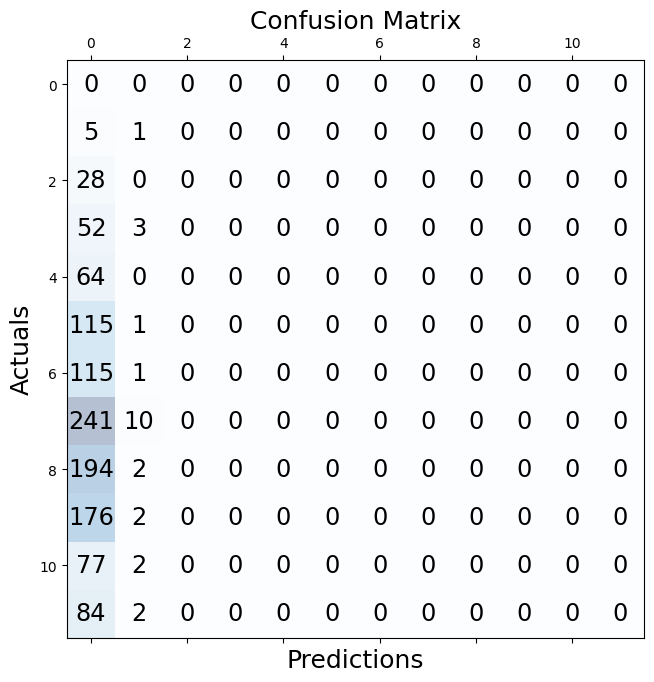

Silhouette Score: 0.21790812118922057
calinski_harabasz Score: 48.333373752351434
davies_bouldin Score: 0.6767915422127296
ari Score: -0.0008637343825158736
nmi Score: 0.006255830610280589
fm_index Score: 0.35330724627499505


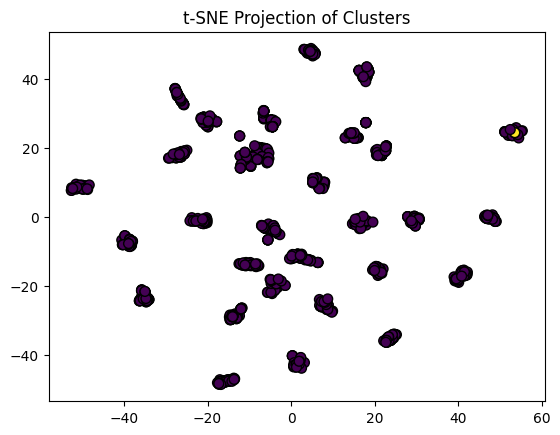

In [ ]:
#applying DBSCAN to entire dataset

Xt=ndf.drop('score', axis=1)
dbt = DBSCAN(eps=0.3, min_samples=10).fit(Xt)
dlabelst = dbt.labels_
conf_matrix=confusion_matrix(y, dlabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, dlabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, dlabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, dlabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], dlabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], dlabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], dlabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dlabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



GAUSSIAN MIXTURE MODEL

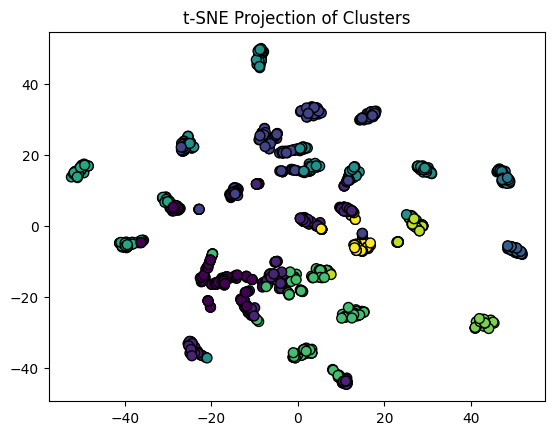

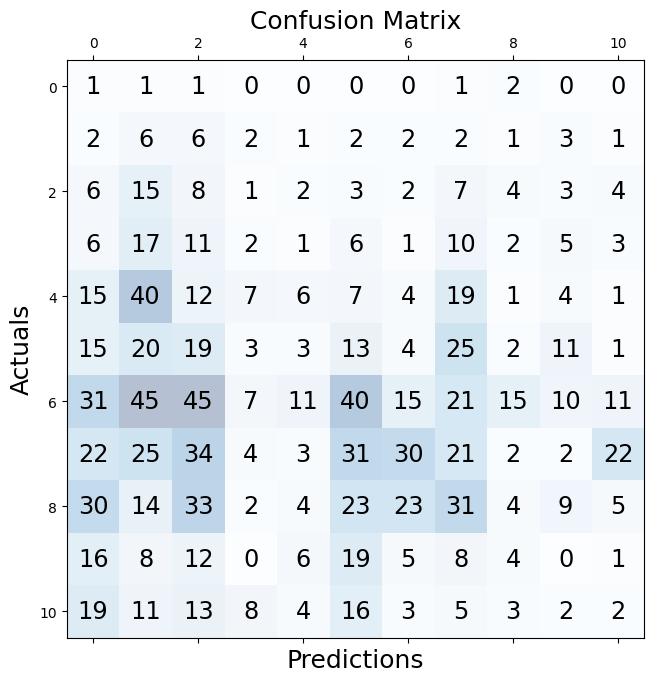

ari Score: 0.01048673026132562
nmi Score: 0.046261004400291794
fm_index Score: 0.13590805107470302
Silhouette Score: 0.2393597183091738
calinski_harabasz Score: 176.22348112432053
davies_bouldin Score: 1.4744635207055148


In [ ]:
#Gaussian Mixture Model (GMM) for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 11, random_state=42)
glabels=gmm.fit_predict(X)
#glabels = gmm.labels_
#glabels = gmm.get_params()['labels_']
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_g = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_g[:, 0], X_tsne_g[:, 1], c=glabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, glabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'],glabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], glabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], glabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, glabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, glabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, glabels)
print(f"davies_bouldin Score: {davies_bouldin}")


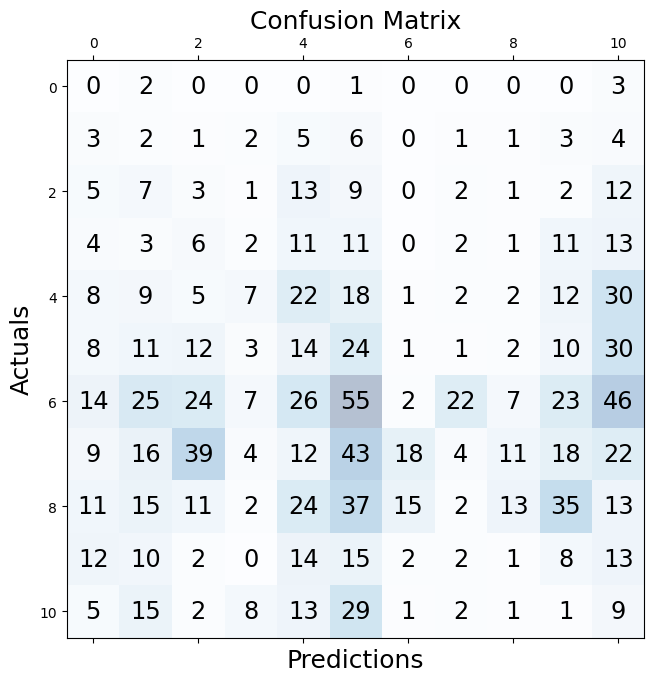

Silhouette Score: 0.23139938203071594
calinski_harabasz Score: 120.65750851057987
davies_bouldin Score: 1.5294140967105099
ari Score: 0.009722075740080507
nmi Score: 0.05130063614975093
fm_index Score: 0.13683856008698295


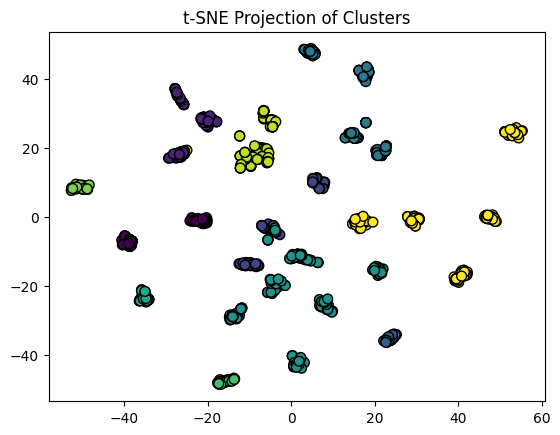

In [ ]:
#applying Gaussian Mixture Model (GMM) to entire dataset

Xt=ndf.drop('score', axis=1)
glabelst=gmm.fit_predict(Xt)
conf_matrix=confusion_matrix(y, glabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, glabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, glabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, glabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], glabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], glabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], glabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=glabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



SPECTRAL CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


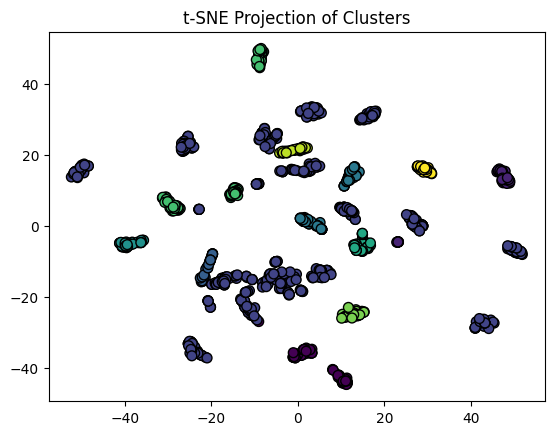

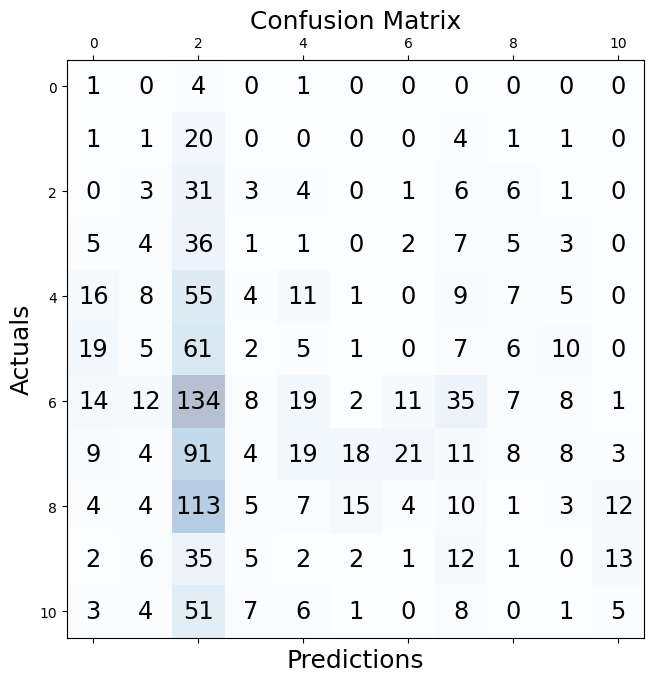

ari Score: 0.003966872550513228
nmi Score: 0.06782940275971308
fm_index Score: 0.20588613257232916
Silhouette Score: 0.03675240739505343
calinski_harabasz Score: 42.54776214915676
davies_bouldin Score: 2.0466193131326516


In [ ]:
#spectral clustering for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', random_state=0)
slabels=sc.fit_predict(X)
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=slabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, slabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], slabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], slabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], slabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, slabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, slabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, slabels)
print(f"davies_bouldin Score: {davies_bouldin}")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


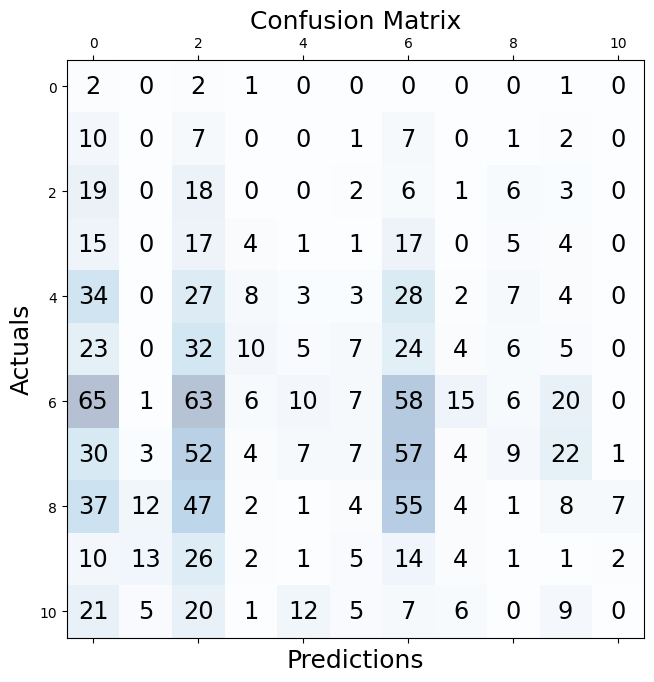

Silhouette Score: 0.018716202360587776
calinski_harabasz Score: 30.443638077414448
davies_bouldin Score: 2.47658307219742
ari Score: 0.00854891316728447
nmi Score: 0.05498685936737688
fm_index Score: 0.16329474708501734


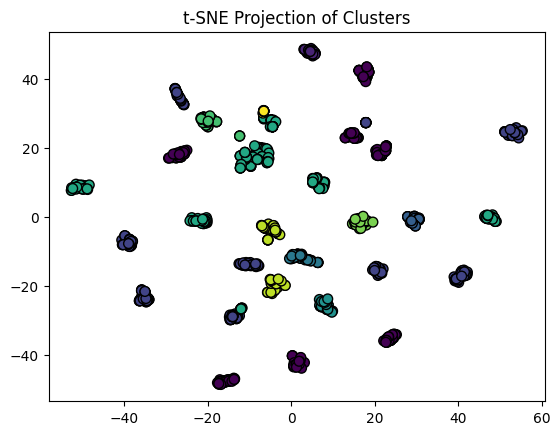

In [ ]:
#applying spectral clustering to entire dataset

Xt=ndf.drop('score', axis=1)
slabelst=sc.fit_predict(Xt)
conf_matrix=confusion_matrix(y, slabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, slabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, slabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, slabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], slabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], slabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], slabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=slabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



BIRCH CLUSTERING

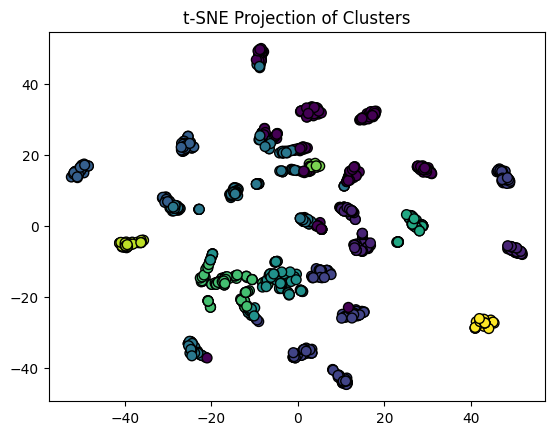

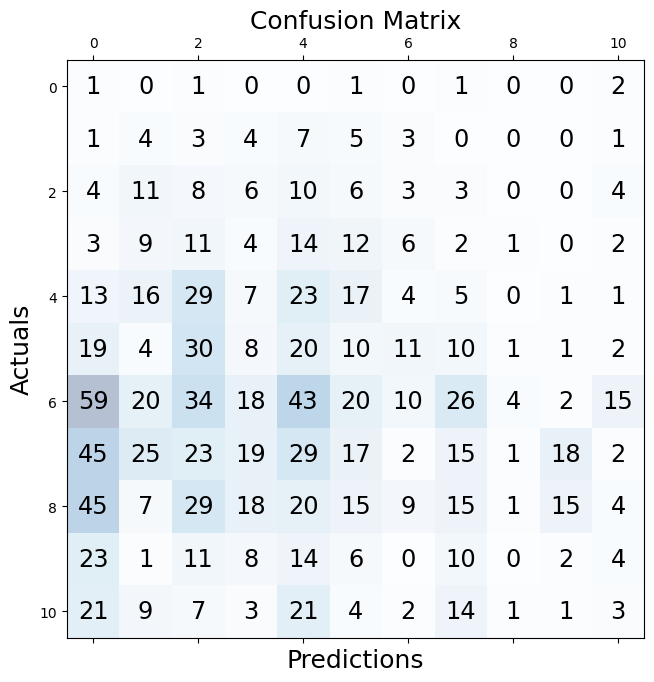

ari Score: 0.01015106665710435
nmi Score: 0.048284985335220965
fm_index Score: 0.13859417406388094
Silhouette Score: 0.19789923572659376
calinski_harabasz Score: 145.83486567817516
davies_bouldin Score: 1.5470718357452355


In [ ]:
#BIRCH for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import Birch
bmodel = Birch(branching_factor = 50, n_clusters = 11, threshold = 1.5)

# Fit the data (Training)
blabels=bmodel.fit_predict(X)
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=blabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, blabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], blabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], blabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], blabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, blabels)
print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, blabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, blabels)
print(f"davies_bouldin Score: {davies_bouldin}")


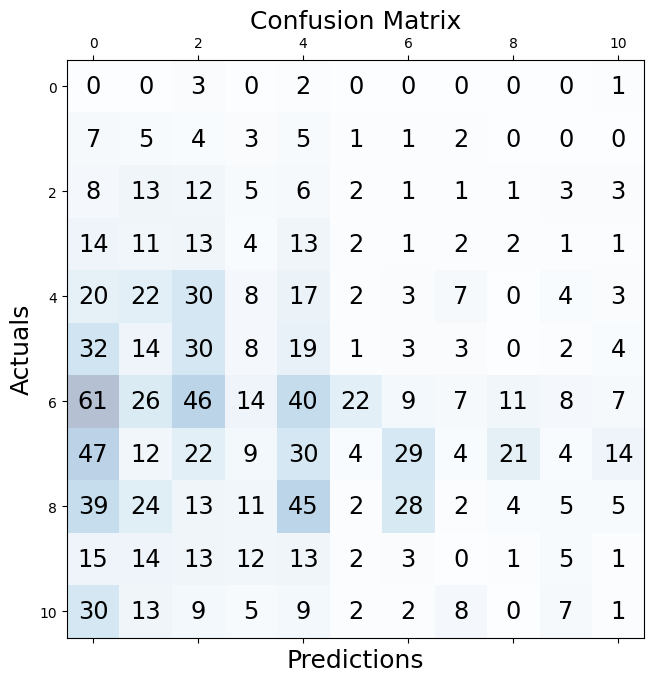

Silhouette Score: 0.2542502876536398
calinski_harabasz Score: 122.56792009279815
davies_bouldin Score: 1.4558129882386674
ari Score: 0.009373647896439451
nmi Score: 0.05191889474812582
fm_index Score: 0.1440620522462341


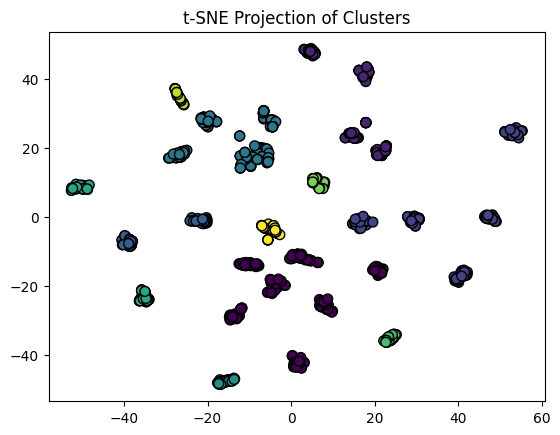

In [ ]:
#applying BIRCH to entire dataset

Xt=ndf.drop('score', axis=1)

blabelst = bmodel.fit_predict(Xt)
conf_matrix=confusion_matrix(y, blabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, blabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, blabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, blabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], blabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], blabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], blabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=blabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



KMEDOIDS CLUSTERING

In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00


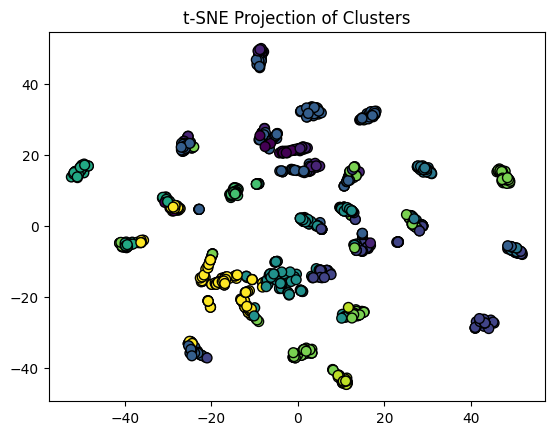

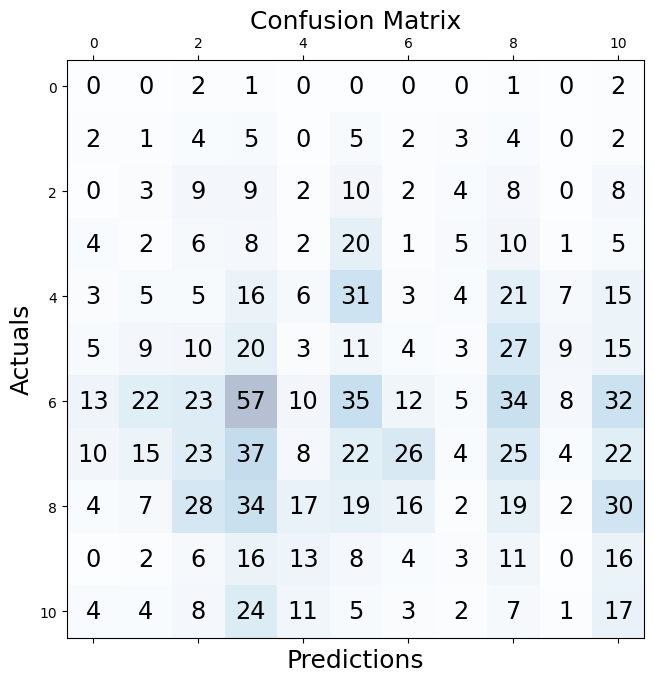

ari Score: 0.006462249134540562
nmi Score: 0.038955319731876256
fm_index Score: 0.13176839465637796
Silhouette Score: 0.12583141362099123
calinski_harabasz Score: 114.89559164866064
davies_bouldin Score: 1.8086155671933817


In [ ]:
#kmedoids for subset dataset
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
kmedoids = KMedoids(n_clusters=11).fit(X)
clabels=kmedoids.labels_

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, clabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], clabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], clabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], clabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, clabels)
print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, clabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, clabels)
print(f"davies_bouldin Score: {davies_bouldin}")


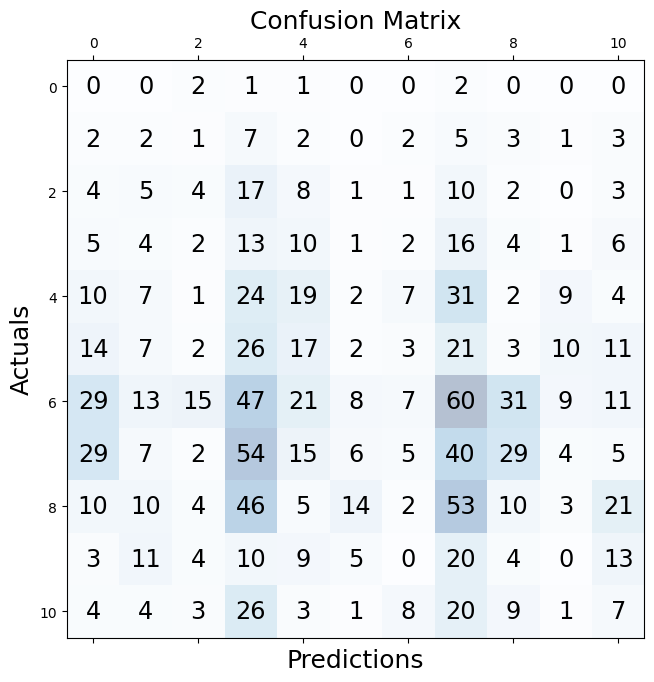

Silhouette Score: 0.201522987580651
calinski_harabasz Score: 88.3709439184696
davies_bouldin Score: 2.0234106145492152
ari Score: 0.008553697181752275
nmi Score: 0.04423656798373363
fm_index Score: 0.1454769133615332


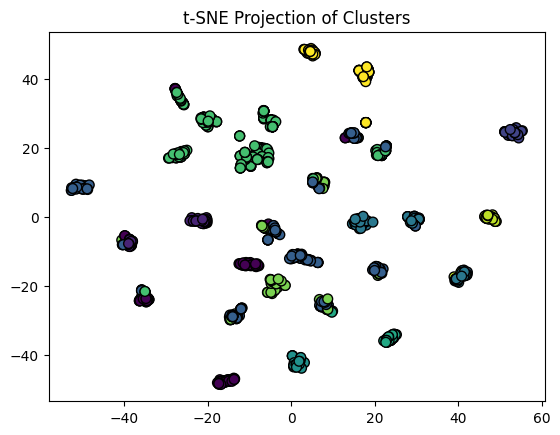

In [ ]:
#applying kmedoids to entire dataset

Xt=ndf.drop('score', axis=1)

kmedoids = KMedoids(n_clusters=11).fit(Xt)
kmlabels=kmedoids.labels_

conf_matrix=confusion_matrix(y, kmlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, kmlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, kmlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, kmlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], kmlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], kmlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], kmlabels)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmlabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

